In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

2023-11-24 12:32:32.725418: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 12:32:32.792909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 12:32:33.220973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 12:32:33.222896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 12:32:34.494371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
TRAIN_DIR="/home/lee/Downloads/Practice/ML/practice4/images/train"
TEST_DIR= "/home/lee/Downloads/Practice/ML/practice4/images/validation"

def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [3]:
train= pd.DataFrame()
train['image'], train['label']=  createdataframe(TRAIN_DIR)

disgust completed
sad completed
neutral completed
fear completed
angry completed
surprise completed
happy completed


In [4]:
print(train)

                                                   image    label
0      /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
1      /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
2      /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
3      /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
4      /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
...                                                  ...      ...
28816  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
28817  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
28818  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
28819  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
28820  /home/lee/Downloads/Practice/ML/practice4/imag...    happy

[28821 rows x 2 columns]


In [5]:
test= pd.DataFrame()
test['image'], test['label']=  createdataframe(TEST_DIR)

disgust completed
sad completed
neutral completed
fear completed
angry completed
surprise completed
happy completed


In [6]:
print(test)

                                                  image    label
0     /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
1     /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
2     /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
3     /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
4     /home/lee/Downloads/Practice/ML/practice4/imag...  disgust
...                                                 ...      ...
7061  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
7062  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
7063  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
7064  /home/lee/Downloads/Practice/ML/practice4/imag...    happy
7065  /home/lee/Downloads/Practice/ML/practice4/imag...    happy

[7066 rows x 2 columns]


In [7]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image, grayscale=True)
        img=np.array(img)
        features.append(img)
    features= np.array(features)
    features= features.reshape(len(features),48,48,1)
    return features

In [8]:
train_features= extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/home/lee/.local/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
test_features= extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [10]:
x_train= train_features/255.0
x_test= test_features/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [12]:
y_train= le.transform(train['label'])
y_test= le.transform(test['label'])

In [13]:
y_train= to_categorical(y_train,num_classes=7)
y_test= to_categorical(y_test,num_classes=7)

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.4))
model.add(Conv2D(256 ,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout (0.4))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.4))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout (0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout (0.3))
model.add(Dense (7, activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.fit(x=x_train,y=y_train,batch_size=128,epochs =5,validation_data=(x_test,y_test))

Epoch 1/5
226/226 [==============================] - 220s 971ms/step - loss: 1.8208 - accuracy: 0.2416 - val_loss: 1.7884 - val_accuracy: 0.2588
Epoch 2/5
226/226 [==============================] - 234s 1s/step - loss: 1.7686 - accuracy: 0.2671 - val_loss: 1.6899 - val_accuracy: 0.3300
Epoch 3/5
226/226 [==============================] - 234s 1s/step - loss: 1.6019 - accuracy: 0.3657 - val_loss: 1.4702 - val_accuracy: 0.4268
Epoch 4/5
226/226 [==============================] - 227s 1s/step - loss: 1.4546 - accuracy: 0.4343 - val_loss: 1.3359 - val_accuracy: 0.4943
Epoch 5/5
226/226 [==============================] - 233s 1s/step - loss: 1.3807 - accuracy: 0.4662 - val_loss: 1.2577 - val_accuracy: 0.5235


In [16]:
model_json = model.to_json()
with open('emotiondetector.json','w') as json_file:
    json_file.write(model_json)
model.save('emotiondetector.h5')

/home/lee/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from keras.models import model_from_json
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [19]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [20]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/home/lee/.local/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 249ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 20ms/step
model prediction is  sad


/home/lee/.local/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


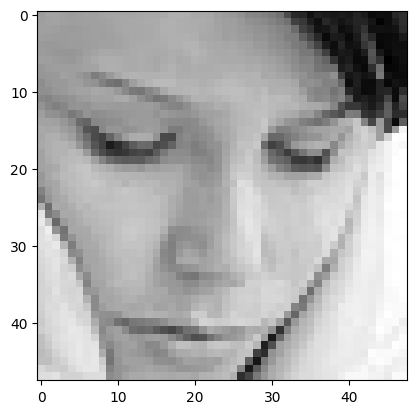

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 19ms/step
model prediction is  angry


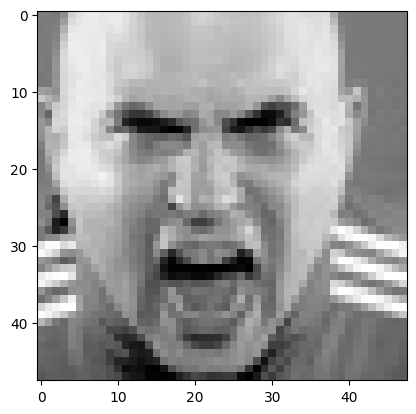

In [23]:
image = 'images/train/angry/22.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')